In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
from tensorflow.keras import layers

In [ ]:
# loading the dataset

(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


array([3], dtype=uint8)

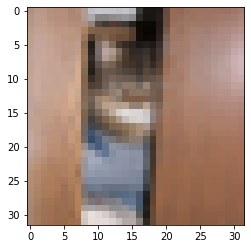

In [ ]:
i = random.randint(1, 50000)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

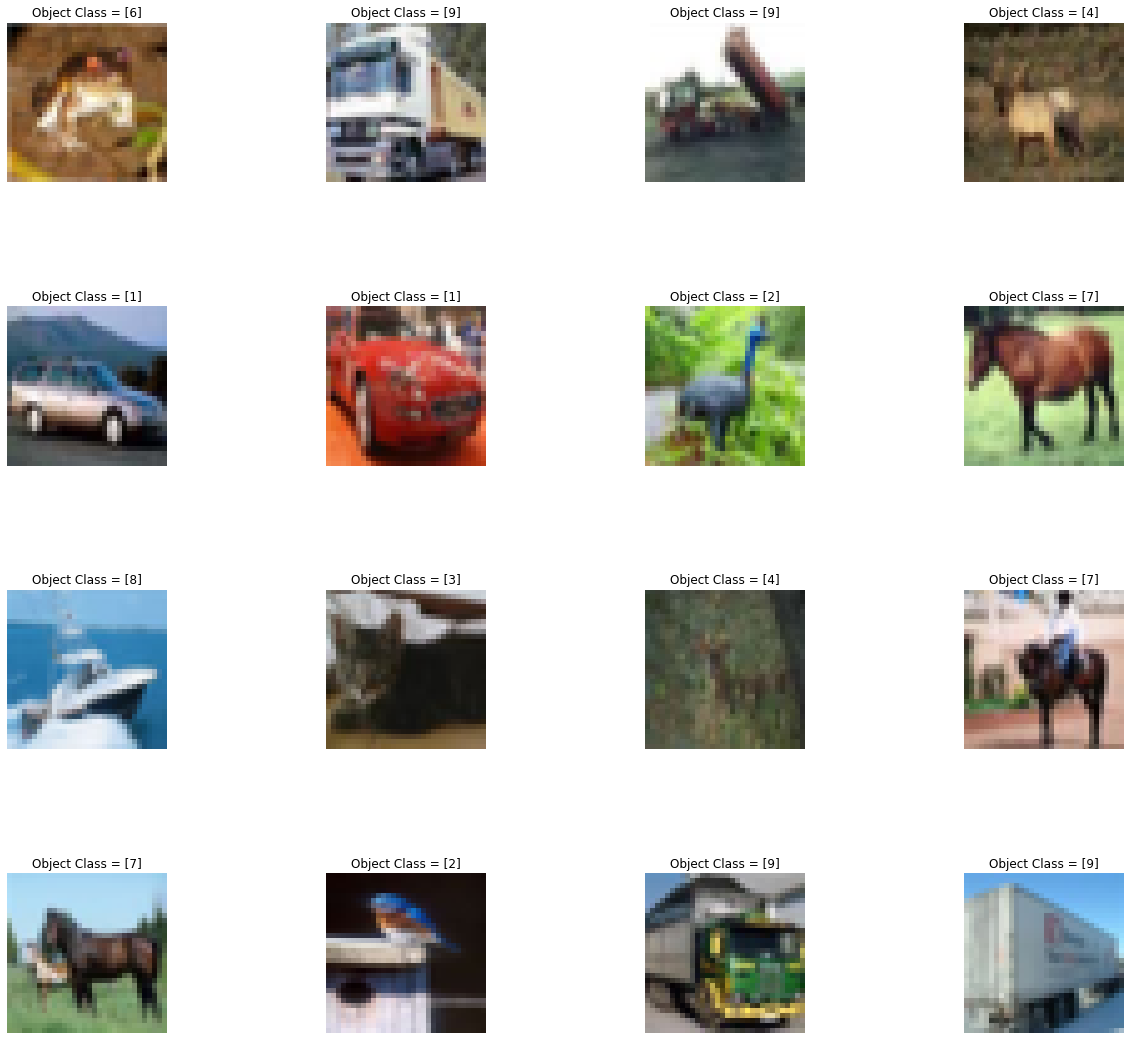

In [ ]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_train[i])
    axes[i].set_title("Object Class = {}".format(y_train[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [ ]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1)

Epoch 1/50
100/100 [==============================] - 22s 212ms/step - loss: 2.3183 - accuracy: 0.2115
Epoch 2/50
100/100 [==============================] - 21s 211ms/step - loss: 1.8869 - accuracy: 0.3265
Epoch 3/50
100/100 [==============================] - 21s 212ms/step - loss: 1.7228 - accuracy: 0.3867
Epoch 4/50
100/100 [==============================] - 21s 213ms/step - loss: 1.6332 - accuracy: 0.4209
Epoch 5/50
100/100 [==============================] - 21s 213ms/step - loss: 1.5786 - accuracy: 0.4405
Epoch 6/50
100/100 [==============================] - 21s 212ms/step - loss: 1.5354 - accuracy: 0.4583
Epoch 7/50
100/100 [==============================] - 21s 213ms/step - loss: 1.4932 - accuracy: 0.4712
Epoch 8/50
100/100 [==============================] - 21s 212ms/step - loss: 1.4575 - accuracy: 0.4856
Epoch 9/50
100/100 [==============================] - 21s 208ms/step - loss: 1.4268 - accuracy: 0.4977
Epoch 10/50
100/100 [==============================] - 21s 205ms/step - l

In [ ]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.1128 - accuracy: 0.6179


In [ ]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.617900013923645


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']


In [ ]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 50)

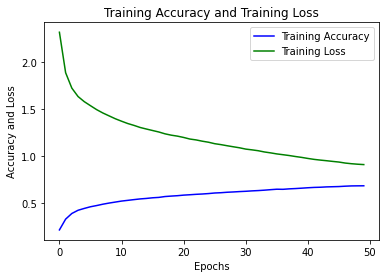

In [ ]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.title('Training Accuracy and Training Loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = LeNet.predict(X_test_gray_norm)
y_true = y_test

In [ ]:
for i in range(len(X_test_gray_norm)):
  print(np.argmax(predicted_classes[i]))

Streaming output truncated to the last 5000 lines.
7
6
0
4
4
5
9
6
4
2
7
5
6
2
7
2
6
7
6
1
8
0
4
8
1
7
4
0
9
6
4
0
2
3
0
5
0
1
4
6
4
9
2
0
5
7
0
5
9
7
2
1
2
3
9
0
9
0
1
4
6
1
5
1
5
0
4
1
5
9
4
1
4
8
4
6
5
2
8
1
7
5
6
9
3
2
3
9
5
6
1
0
9
7
9
8
7
3
2
5
5
5
6
9
8
5
2
9
1
0
8
6
6
6
7
1
6
7
4
7
9
6
6
7
0
1
0
1
4
6
8
6
9
2
6
1
9
0
8
6
8
6
8
9
9
4
8
5
5
6
4
4
8
9
0
5
5
6
4
4
0
3
5
4
0
2
0
2
7
2
9
4
4
0
6
9
3
2
3
5
9
1
3
3
6
3
5
4
0
0
6
3
1
2
7
4
2
8
4
6
5
8
1
5
3
0
0
6
4
7
5
7
5
4
9
1
6
1
4
4
0
7
5
0
0
0
1
4
3
5
6
4
3
1
7
4
0
4
0
4
9
6
8
1
2
1
5
9
9
8
7
5
4
0
1
0
0
1
6
0
0
7
0
8
6
2
4
6
0
7
1
5
5
9
6
4
9
8
2
0
0
4
4
7
6
1
6
7
4
2
4
9
3
0
8
0
3
6
5
7
9
7
2
5
6
6
7
9
9
4
8
1
5
1
9
9
4
4
0
7
3
1
4
1
8
8
7
8
0
0
7
2
9
7
6
1
3
2
0
9
4
2
7
3
4
4
4
4
1
5
9
3
3
6
4
8
7
0
0
6
7
8
4
7
7
6
1
0
8
2
6
7
5
1
0
0
5
3
7
3
1
3
0
8
6
3
0
6
6
4
1
9
1
7
1
8
1
9
8
6
9
8
4
7
6
0
7
4
0
1
5
6
6
5
4
4
1
7
8
2
6
6
1
6
6
3
5
8
6
6
7
1
9
5
6
4
7
0
4
1
9
3
6
6
9
7
0
5
9
1
3
6
0
2
0
1
9
8
6
4
0
0
2
5
7
7
8
5
5
4
1
6
1
3
1

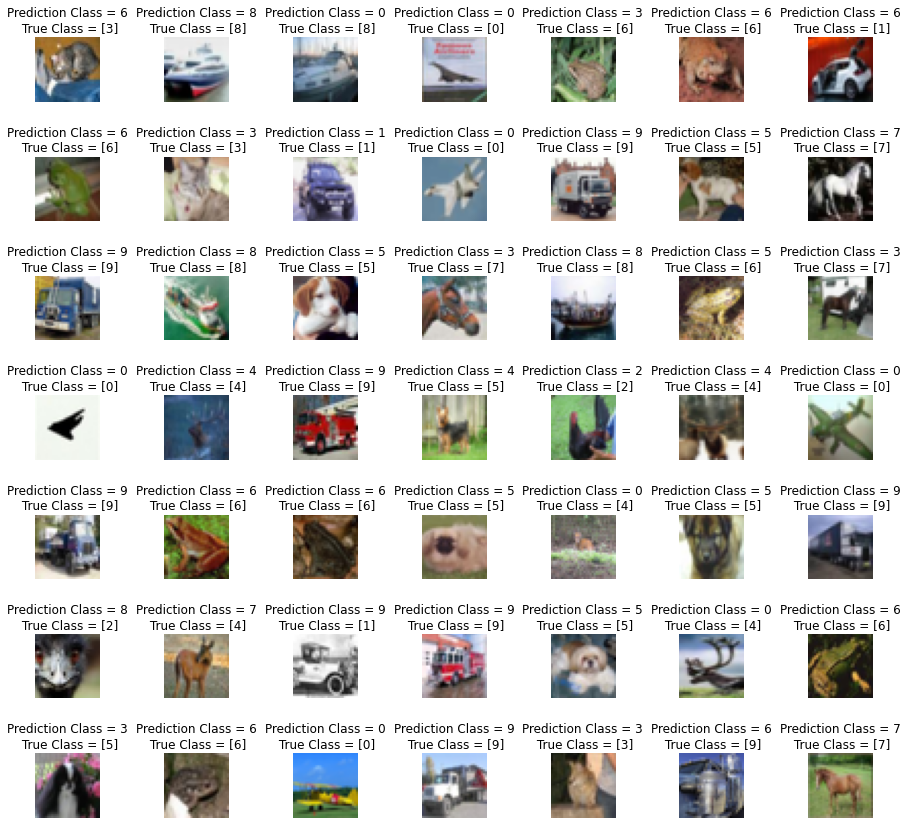

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(np.argmax(predicted_classes[i]), (y_true[i])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)